In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [5]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print(df.describe)
print(df.columns)
df.head(10)

<bound method NDFrame.describe of            Date  Year Month  Recession  Consumer_Confidence  \
0     1/31/1980  1980   Jan          1               108.24   
1     2/29/1980  1980   Feb          1                98.75   
2     3/31/1980  1980   Mar          1               107.48   
3     4/30/1980  1980   Apr          1               115.01   
4     5/31/1980  1980   May          1                98.72   
..          ...   ...   ...        ...                  ...   
523   8/31/2023  2023   Aug          0               103.36   
524   9/30/2023  2023   Sep          0               101.55   
525  10/31/2023  2023   Oct          0               124.66   
526  11/30/2023  2023   Nov          0                97.09   
527  12/31/2023  2023   Dec          0                95.92   

     Seasonality_Weight      Price  Advertising_Expenditure  Competition  \
0                  0.50  27483.571                     1558            7   
1                  0.75  24308.678                     30

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


Text(0.5, 1.0, 'Automobile Sales during Recessions')

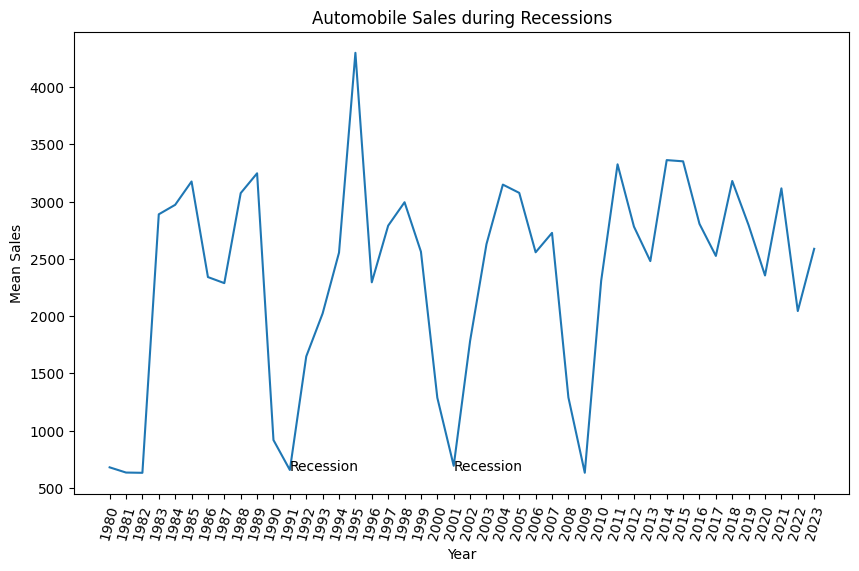

In [17]:
#1.1
plt.figure(figsize=(10, 6))
df_annual_sales = df.groupby('Year')['Automobile_Sales'].mean()
df_annual_sales.plot(x=df_annual_sales.index,y=df_annual_sales.values, kind='line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.text(1991, 650, 'Recession')
plt.text(2001, 650, 'Recession')
plt.title('Automobile Sales during Recessions')

Text(0.5, 1.0, 'Automobile Type Sales during Recessions')

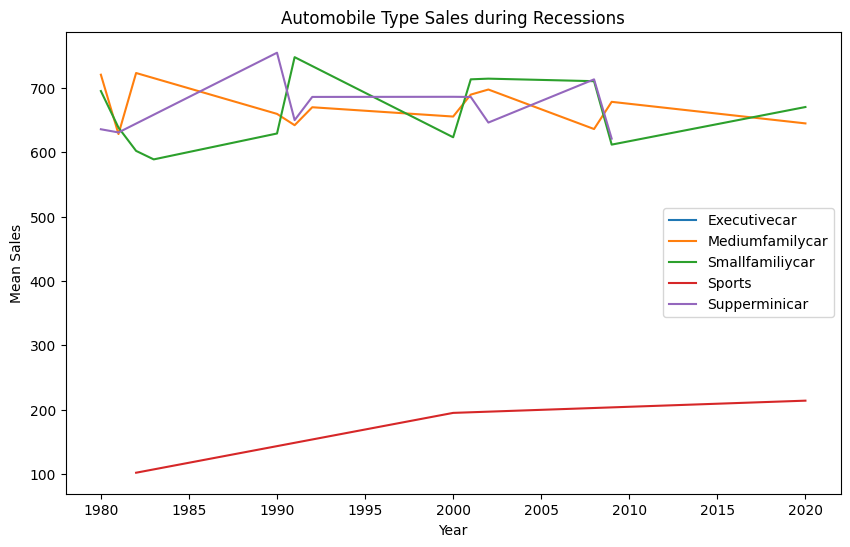

In [47]:
#1.2
plt.figure(figsize=(10, 6))
df_annual_sales_type = df[df['Recession']==1]
df_annual_sales_type = df_annual_sales_type.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_annual_sales_type.set_index('Year', inplace = True)
df_annual_sales_type = df_annual_sales_type.groupby(['Vehicle_Type'])['Automobile_Sales']
df_annual_sales_type.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.legend()
plt.title('Automobile Type Sales during Recessions')


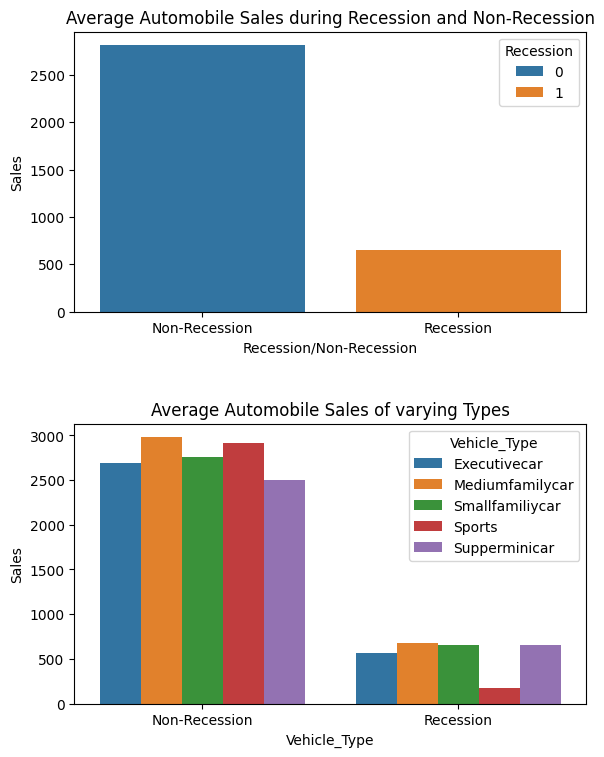

In [71]:
fig, axs = plt.subplots(nrows=2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
df_recession = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=df_recession, ax=axs[0])
axs[0].set_xlabel('Recession/Non-Recession')
axs[0].set_ylabel('Sales')
axs[0].set_title('Average Automobile Sales during Recession and Non-Recession')
axs[0].set_xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])

df_recession_filter = df[df['Recession'] == 1]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
sales_by_vehicle_type = df_recession_filter.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd, ax=axs[1])
axs[1].set_xlabel('Vehicle_Type')
axs[1].set_ylabel('Sales')
axs[1].set_title('Average Automobile Sales of varying Types')
axs[1].set_xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])



In [ ]:
#1.4
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()